In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import acquire
import prepare
#requests will allow us to interact with the web via python
import requests
import os

from acquire import acquire_stores

## Exploratory Analysis Exercise
### Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [2]:
#get my store data
df = prepare.store_items()
df.head()

,item,sale_amount,sale_id,store,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,01-Jan,2-Tue,10.92
2013-01-01,17,26.0,295813,3,16,16.0,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,01-Jan,2-Tue,30.16
2013-01-01,7,32.0,125995,10,6,6.0,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,01-Jan,2-Tue,308.48
2013-01-01,18,45.0,314073,3,17,17.0,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,01-Jan,2-Tue,197.55
2013-01-01,19,34.0,332333,3,18,18.0,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,01-Jan,2-Tue,25.16


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store          913000 non-null  int64  
 4   level_0        913000 non-null  int64  
 5   index          730400 non-null  float64
 6   item_brand     913000 non-null  object 
 7   item_id        913000 non-null  int64  
 8   item_name      913000 non-null  object 
 9   item_price     913000 non-null  float64
 10  item_upc12     913000 non-null  int64  
 11  item_upc14     913000 non-null  int64  
 12  store_address  913000 non-null  object 
 13  store_city     913000 non-null  object 
 14  store_id       913000 non-null  int64  
 15  store_state    913000 non-null  object 
 16  store_zipcode  913000 non-null  int64  
 17  month        

## Visualizations

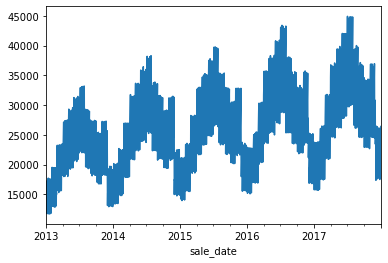

In [5]:
# Let's see the overall sale totals over time
df.groupby(df.index).sale_amount.sum().plot();

In [8]:
# the train set everything up to and including 2016,
# the test set will be 2017
train = df.loc[ : '2016']
test = df.loc['2017']

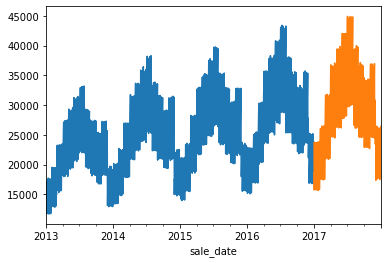

In [9]:
#visualize
train.groupby(train.index).sale_amount.sum().plot()
test.groupby(test.index).sale_amount.sum().plot();

In [10]:
train.sale_amount

sale_date
2013-01-01    13.0
2013-01-01    26.0
2013-01-01    32.0
2013-01-01    45.0
2013-01-01    34.0
              ... 
2016-12-31    43.0
2016-12-31    68.0
2016-12-31    26.0
2016-12-31    45.0
2016-12-31    20.0
Name: sale_amount, Length: 730500, dtype: float64

## 1 Blow off the time series

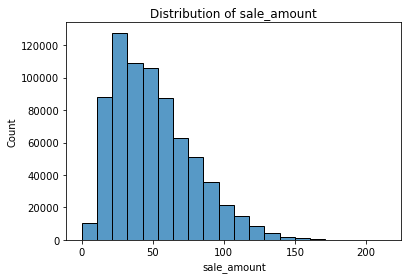

In [11]:
# Let's see the distribution of sale_amount
sns.histplot(train.sale_amount, bins = 20)
plt.title('Distribution of sale_amount');

In [ ]:
# highest distribution of sale amounts are below 50

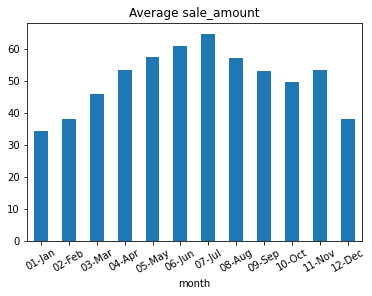

In [13]:
# Let's see average sale_amount for each month
ax = train.groupby(train.month).sale_amount.mean().plot.bar()
ax.tick_params('x', rotation = 30)
plt.title('Average sale_amount');

In [ ]:
#the months of May, June, July, Aug have higher sale totals.

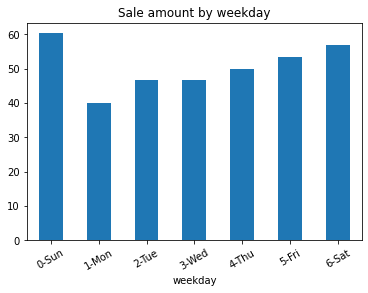

In [14]:
# Let's see the average sale_amount by weekday
ax = train.groupby(train.weekday).sale_amount.mean().plot.bar()
ax.tick_params('x', rotation = 30)
plt.title('Sale amount by weekday');

<AxesSubplot:xlabel='weekday', ylabel='sale_amount'>

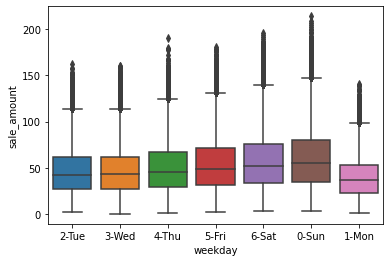

In [17]:
sns.boxplot(data=train, y='sale_amount', x='weekday')

In [ ]:
#Weekends have higher totals than weekdays

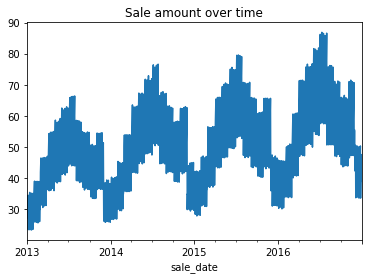

In [15]:
# Let's see the sale_amount over time
train.groupby(train.index).sale_amount.mean().plot()
plt.title('Sale amount over time');

In [ ]:
#There is an upward trend in average sale totals over time

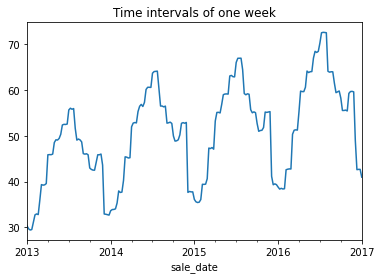

In [16]:
# Let's look at time intervals of one week
train.resample('1W').sale_amount.mean().plot()
plt.title('Time intervals of one week');

In [ ]:
#The upward trend from the previous graph is still evident

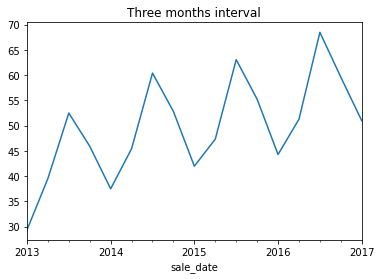

In [18]:
# Now let's take a look at 3 month intervals
train.resample('3M').sale_amount.mean().plot()
plt.title('Three months interval');

In [ ]:
# we can now see clearly distinctions in sale total between summer and winter times

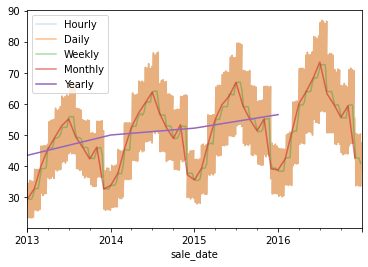

In [22]:
# can now visualize various intervals in one chart.
train.groupby(train.index).sale_amount.mean().plot(alpha = 0.2, label = 'Hourly')
train.resample('D').sale_amount.mean().plot(alpha=0.5, label = 'Daily')
train.resample('W').sale_amount.mean().plot(alpha = 0.4, label = 'Weekly')
train.resample('M').sale_amount.mean().plot(alpha = 0.6, label = 'Monthly')
train.resample('Y').sale_amount.mean().plot(label = 'Yearly')
plt.legend();

## Change in y over time

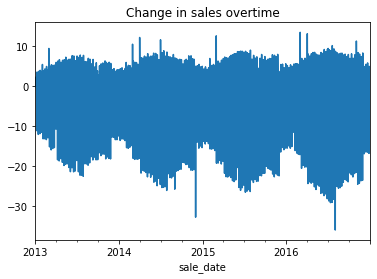

In [23]:
# plotting the change in sale amount over time
train.groupby(train.index).sale_amount.mean().diff().plot()
plt.title("Change in sales overtime");

In [ ]:
# ops! it didn't help, not a good pattern

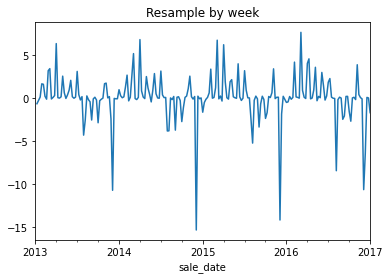

In [24]:
# plot resample by week
train.resample('W').sale_amount.mean().diff().plot()
plt.title('Resample by week');

In [ ]:
# The greatest change seems to occur at the beginning of every year

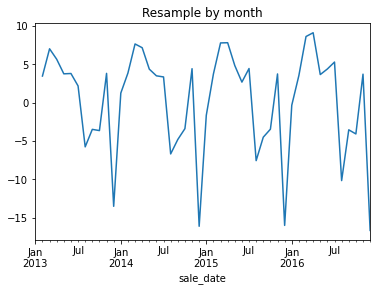

In [25]:
# plot resample by month
train.resample('M').sale_amount.mean().diff().plot()
plt.title('Resample by month');

In [ ]:
# we can see that sales drop drastically around at the end of evey year

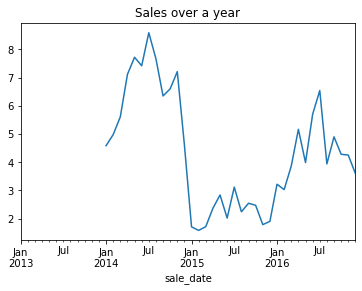

In [26]:
# plot sales over 1 year
train.resample('M').sale_amount.mean().diff(12).plot()
plt.title('Sales over a year');


In [ ]:
# can see that sales increase and drop over time in each month

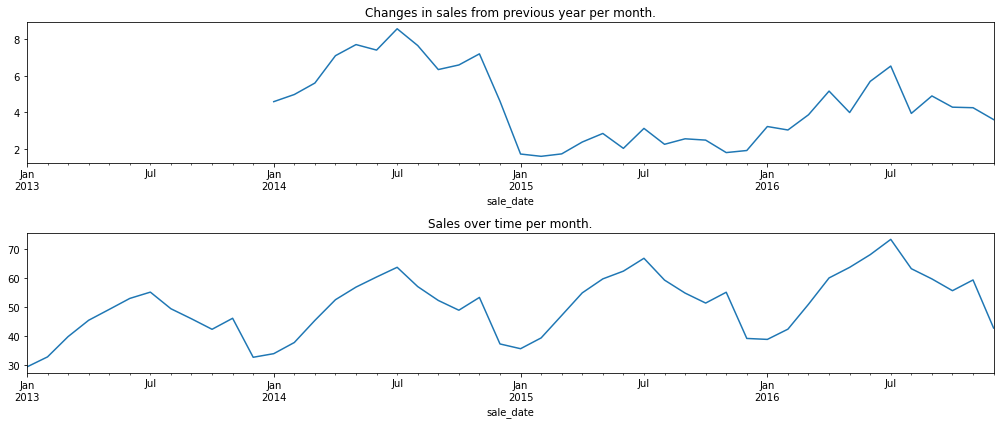

In [27]:
# plot previous chart next to the monthly sales chart.
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (14, 6))

train.resample('M').sale_amount.mean().diff(12).plot(ax = ax[0])
ax[0].set_title('Changes in sales from previous year per month.')

train.resample('M').sale_amount.mean().plot(ax = ax[1])
ax[1].set_title('Sales over time per month.')

plt.tight_layout();